In [338]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation

In [267]:
# Generating synthetic data
X, y = make_blobs(
    n_samples=300,
    n_features=3,
    random_state=20
)

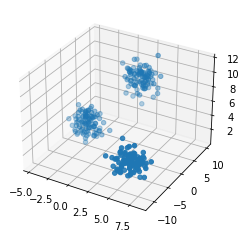

In [268]:
# Visualizing Data
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2]);

In [269]:
# Preprocessing
X = MinMaxScaler().fit_transform(X)

In [363]:
K = 3 # Number of clusters
k = X.shape[1] # Dimensionality of our Data

In [364]:
# Applying PCA to reduce dimensions of data from 3D to 2D
m = X.shape[0]

sigma = (1/m) * np.dot(X.T, X)
U, S, V = np.linalg.svd(sigma)
U_reduce = U[:, 0:k]
z = np.dot(X, U_reduce) # (300x2) dimensions
X = z

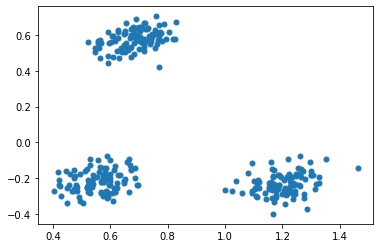

In [365]:
# Visualizing lower dimensional feature vector z
plt.scatter(X[:, 0], X[:, 1], marker='o', s=25)

In [380]:
# Randomly intialize cluster centroids
initial_centroids = np.zeros((K, k))

for i in range(K):
    initial_centroids[i] = np.random.permutation(X)[0]

In [381]:
initial_centroids

array([[ 0.57125443, -0.21353754],
       [ 0.49241957, -0.32675133],
       [ 0.62784171, -0.17945637]])

In [390]:
# Cluster assignment step
def cluster_assignment_step(X, centroids):
    m = X.shape[0]
    idx = np.zeros((m, 1))
    
    for i in range(m):
        c = []
        for x in range(K):
            distance = np.sqrt(sum(np.square(X[i] - centroids[x]))) ** 2
            c.append(distance)
        idx[i] = c.index(min(c))
        
    return idx

In [391]:
# Move centroids step
def move_centroid_step(X, idx):
    m, n = X.shape
    centroids = np.zeros((K, n))

    for i in range(k+1):
        desc = [0, 0]
        for x in range(m):
            if (idx[x] == 0 and i == 0):
                desc[0] += X[x]
                desc[1] += 1
            elif (idx[x] == 1 and i == 1):
                desc[0] += X[x]
                desc[1] += 1
            elif (idx[x] == 2 and i == 2):
                desc[0] += X[x]
                desc[1] += 1

        centroids[i] = np.divide(desc[0], desc[1])

    return centroids

In [392]:
# Running the K-means algorithm
ITERATIONS = 30

idx_history = []
centroid_history = []
centroids = initial_centroids

for i in range(ITERATIONS):
    idx = cluster_assignment_step(X, centroids)
    centroids = move_centroid_step(X, idx)

    idx_history.append(idx)
    centroid_history.append(centroids)

In [393]:
print(f'Cluster centroids of converged K-means: {centroid_history[-1]}')

Cluster centroids of converged K-means: [[ 1.20136509 -0.23134345]
 [ 0.55800603 -0.21895012]
 [ 0.68736327  0.57682377]]


In [394]:
# 

def plotProgresskMeans(i, X, centroid_history, idx_history):
    plt.gcf().clf()
    cmap = plt.cm.rainbow
    norm = mpl.colors.Normalize(vmin=0, vmax=2)

    for k in range(K):
        current = np.stack([c[k, :] for c in centroid_history[:i+1]], axis=0)
        plt.plot(current[:, 0], current[:, 1],
                    '-Xk',
                    mec='k',
                    lw=2,
                    ms=10,
                    mfc=cmap(norm(k)),
                    mew=2)

        plt.scatter(X[:, 0], X[:, 1],
                       c=idx_history[i],
                       cmap=cmap,
                       marker='o',
                       s=8**2,
                       linewidths=1,)
    plt.grid(False)
    plt.title('Iteration number %d' % (i+1))

In [395]:
fig = plt.figure()
anim = FuncAnimation(fig, plotProgresskMeans,
                     frames=ITERATIONS,
                     interval=500,
                     repeat_delay=2,
                     fargs=(X, centroid_history, idx_history))

<Figure size 432x288 with 0 Axes>

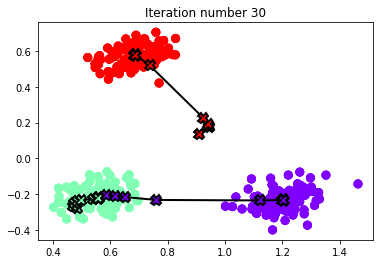

In [397]:
anim.save('centroid_movement.gif', writer='pillow')